In [1]:
import pandas as pd
from rdkit import Chem
from chembl_webresource_client.new_client import new_client
from rdkit.Chem import PandasTools
from IPython.display import HTML

# Search for Target protein

In [2]:
activity = new_client.activity
res = activity.filter(target_chembl_id='CHEMBL1865').filter(standard_type="IC50")

In [3]:
df = pd.DataFrame.from_dict(res)

In [4]:
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,157540,[],CHEMBL698975,Inhibitory concentration against human Histone...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 6,9606,None,None,IC50,nM,UO_0000065,None,100000.0
1,None,None,167393,[],CHEMBL698975,Inhibitory concentration against human Histone...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 6,9606,None,None,IC50,nM,UO_0000065,None,14000.0
2,None,None,180809,[],CHEMBL698975,Inhibitory concentration against human Histone...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 6,9606,None,None,IC50,nM,UO_0000065,None,790.0
3,None,None,1266084,[],CHEMBL698810,Inhibition of Histone deacetylase 6 (HDAC6) of...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 6,9606,None,None,IC50,uM,UO_0000065,None,100.0
4,None,None,1266089,[],CHEMBL698810,Inhibition of Histone deacetylase 6 (HDAC6) of...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 6,9606,None,None,IC50,uM,UO_0000065,None,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6282,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24965645,[],CHEMBL5217051,Inhibition of HDAC6 (unknown origin) measured ...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 6,9606,None,None,IC50,nM,UO_0000065,None,39.0
6283,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24965646,[],CHEMBL5217051,Inhibition of HDAC6 (unknown origin) measured ...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 6,9606,None,None,IC50,nM,UO_0000065,None,17.0
6284,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24965647,[],CHEMBL5217051,Inhibition of HDAC6 (unknown origin) measured ...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 6,9606,None,None,IC50,nM,UO_0000065,None,9.4
6285,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24967409,[],CHEMBL5217455,Inhibition of HDAC6 (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 6,9606,None,None,IC50,nM,UO_0000065,None,15.0


In [5]:
df.columns

Index(['action_type', 'activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

# Handling data

If any compounds has missing value for the standard_value and canonical_smiles column then drop it.

In [6]:
df2 = df[df.pchembl_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

C:\Users\Developer\Anaconda3\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
1,None,None,167393,[],CHEMBL698975,Inhibitory concentration against human Histone...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 6,9606,None,None,IC50,nM,UO_0000065,None,14000.0
2,None,None,180809,[],CHEMBL698975,Inhibitory concentration against human Histone...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 6,9606,None,None,IC50,nM,UO_0000065,None,790.0
5,None,None,1270390,[],CHEMBL698810,Inhibition of Histone deacetylase 6 (HDAC6) of...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 6,9606,None,None,IC50,uM,UO_0000065,None,0.62
6,None,None,1271621,[],CHEMBL698810,Inhibition of Histone deacetylase 6 (HDAC6) of...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 6,9606,None,None,IC50,uM,UO_0000065,None,0.78
7,None,None,1275486,[],CHEMBL698810,Inhibition of Histone deacetylase 6 (HDAC6) of...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 6,9606,None,None,IC50,uM,UO_0000065,None,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6282,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24965645,[],CHEMBL5217051,Inhibition of HDAC6 (unknown origin) measured ...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 6,9606,None,None,IC50,nM,UO_0000065,None,39.0
6283,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24965646,[],CHEMBL5217051,Inhibition of HDAC6 (unknown origin) measured ...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 6,9606,None,None,IC50,nM,UO_0000065,None,17.0
6284,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24965647,[],CHEMBL5217051,Inhibition of HDAC6 (unknown origin) measured ...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 6,9606,None,None,IC50,nM,UO_0000065,None,9.4
6285,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24967409,[],CHEMBL5217455,Inhibition of HDAC6 (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 6,9606,None,None,IC50,nM,UO_0000065,None,15.0


In [7]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value','pchembl_value', 'document_chembl_id']

In [8]:
df3 = df2[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value,pchembl_value,document_chembl_id
1,CHEMBL343448,C/C=C1\NC(=O)[C@H]2CSSCC/C=C/[C@H](CC(=O)N[C@H...,14000.0,4.85,CHEMBL1145900
2,CHEMBL146250,C/C=C1\NC(=O)[C@@H](CS)NC(=O)[C@@H](C(C)C)NC(=...,790.0,6.10,CHEMBL1145900
5,CHEMBL336935,O=CN(O)CCCCCC(C(=O)Nc1ccc2ncccc2c1)C(=O)Nc1ccc...,620.0,6.21,CHEMBL1137945
6,CHEMBL140525,O=CN(O)CCCCCC(C(=O)Nc1cnc2ccccc2c1)C(=O)Nc1cnc...,780.0,6.11,CHEMBL1137945
7,CHEMBL141082,O=CN(O)CCCCCC(=O)Nc1ccccc1,2800.0,5.55,CHEMBL1137945
...,...,...,...,...,...
6282,CHEMBL98,O=C(CCCCCCC(=O)Nc1ccccc1)NO,39.0,7.41,CHEMBL5214954
6283,CHEMBL2364628,O=C(CCCCCCNC(=O)c1cnc(N(c2ccccc2)c2ccccc2)nc1)NO,17.0,7.77,CHEMBL5214954
6284,CHEMBL2018302,CN1CCc2c(c3ccccc3n2Cc2ccc(C(=O)NO)cc2)C1,9.4,8.03,CHEMBL5214954
6285,CHEMBL2018302,CN1CCc2c(c3ccccc3n2Cc2ccc(C(=O)NO)cc2)C1,15.0,7.82,CHEMBL5214973


In [9]:
def convert_smi_to_canon_smi(smi):
    canon_smi = Chem.MolToSmiles(Chem.MolFromSmiles(smi),isomericSmiles = False)
    return canon_smi 

In [11]:
df3["canonical_smiles"] = df3.apply(lambda x: convert_smi_to_canon_smi(x.canonical_smiles), axis=1)

C:\Users\Developer\Anaconda3\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df3

,molecule_chembl_id,canonical_smiles,standard_value,pchembl_value,document_chembl_id
1,CHEMBL343448,CC=C1NC(=O)C2CSSCCC=CC(CC(=O)NC(C(C)C)C(=O)N2)...,14000.0,4.85,CHEMBL1145900
2,CHEMBL146250,CC=C1NC(=O)C(CS)NC(=O)C(C(C)C)NC(=O)CC(C=CCCS)...,790.0,6.10,CHEMBL1145900
5,CHEMBL336935,O=CN(O)CCCCCC(C(=O)Nc1ccc2ncccc2c1)C(=O)Nc1ccc...,620.0,6.21,CHEMBL1137945
6,CHEMBL140525,O=CN(O)CCCCCC(C(=O)Nc1cnc2ccccc2c1)C(=O)Nc1cnc...,780.0,6.11,CHEMBL1137945
7,CHEMBL141082,O=CN(O)CCCCCC(=O)Nc1ccccc1,2800.0,5.55,CHEMBL1137945
...,...,...,...,...,...
6282,CHEMBL98,O=C(CCCCCCC(=O)Nc1ccccc1)NO,39.0,7.41,CHEMBL5214954
6283,CHEMBL2364628,O=C(CCCCCCNC(=O)c1cnc(N(c2ccccc2)c2ccccc2)nc1)NO,17.0,7.77,CHEMBL5214954
6284,CHEMBL2018302,CN1CCc2c(c3ccccc3n2Cc2ccc(C(=O)NO)cc2)C1,9.4,8.03,CHEMBL5214954
6285,CHEMBL2018302,CN1CCc2c(c3ccccc3n2Cc2ccc(C(=O)NO)cc2)C1,15.0,7.82,CHEMBL5214973


In [13]:
def convert_smi_to_inchi(smi):
    molecule = Chem.MolFromSmiles(smi)
    inchikey = str(Chem.MolToInchi(molecule))
    return inchikey 

In [14]:
df3["inchi"] = df3.apply(lambda x: convert_smi_to_inchi(x.canonical_smiles), axis=1)

C:\Users\Developer\Anaconda3\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df3

,molecule_chembl_id,canonical_smiles,standard_value,pchembl_value,document_chembl_id,inchi
1,CHEMBL343448,CC=C1NC(=O)C2CSSCCC=CC(CC(=O)NC(C(C)C)C(=O)N2)...,14000.0,4.85,CHEMBL1145900,InChI=1S/C24H36N4O6S2/c1-6-16-21(30)28-20(14(4...
2,CHEMBL146250,CC=C1NC(=O)C(CS)NC(=O)C(C(C)C)NC(=O)CC(C=CCCS)...,790.0,6.10,CHEMBL1145900,InChI=1S/C24H38N4O6S2/c1-6-16-21(30)28-20(14(4...
5,CHEMBL336935,O=CN(O)CCCCCC(C(=O)Nc1ccc2ncccc2c1)C(=O)Nc1ccc...,620.0,6.21,CHEMBL1137945,InChI=1S/C27H27N5O4/c33-18-32(36)15-3-1-2-8-23...
6,CHEMBL140525,O=CN(O)CCCCCC(C(=O)Nc1cnc2ccccc2c1)C(=O)Nc1cnc...,780.0,6.11,CHEMBL1137945,InChI=1S/C27H27N5O4/c33-18-32(36)13-7-1-2-10-2...
7,CHEMBL141082,O=CN(O)CCCCCC(=O)Nc1ccccc1,2800.0,5.55,CHEMBL1137945,InChI=1S/C13H18N2O3/c16-11-15(18)10-6-2-5-9-13...
...,...,...,...,...,...,...
6282,CHEMBL98,O=C(CCCCCCC(=O)Nc1ccccc1)NO,39.0,7.41,CHEMBL5214954,InChI=1S/C14H20N2O3/c17-13(15-12-8-4-3-5-9-12)...
6283,CHEMBL2364628,O=C(CCCCCCNC(=O)c1cnc(N(c2ccccc2)c2ccccc2)nc1)NO,17.0,7.77,CHEMBL5214954,InChI=1S/C24H27N5O3/c30-22(28-32)15-9-1-2-10-1...
6284,CHEMBL2018302,CN1CCc2c(c3ccccc3n2Cc2ccc(C(=O)NO)cc2)C1,9.4,8.03,CHEMBL5214954,InChI=1S/C20H21N3O2/c1-22-11-10-19-17(13-22)16...
6285,CHEMBL2018302,CN1CCc2c(c3ccccc3n2Cc2ccc(C(=O)NO)cc2)C1,15.0,7.82,CHEMBL5214973,InChI=1S/C20H21N3O2/c1-22-11-10-19-17(13-22)16...


In [16]:
df3['pchembl_value'] = pd.to_numeric(df3['pchembl_value'], downcast="float")

C:\Users\Developer\Anaconda3\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
mean_std = df3.groupby(['canonical_smiles'], as_index=False).agg({'pchembl_value':['mean','std']})
mean_std

canonical_smiles pchembl_value    
                                                                 mean std
0       C#CCN(C)CCCOc1cc(NC(=O)CCCCCCC(=O)NO)c(Cl)cc1Cl          7.22 NaN
1           C#CCN(C)CCCOc1cc(NC(=O)CCCCCCC(=O)NO)ccc1Cl          8.00 NaN
2          C#CCN(C)CCCOc1cc(NC(=O)CCCCCCCC(=O)NO)ccc1Cl          7.10 NaN
3         C#CCN(C)CCCOc1cc(NC(=O)CCCCCCCCC(=O)NO)ccc1Cl          6.80 NaN
4           C#CCN(C)CCCOc1cc(NCc2ccc(C(=O)NO)cc2)ccc1Cl          8.00 NaN
...                                                 ...           ...  ..
3874                            S=C1Sc2ccccc2C2=NCCCN12          5.33 NaN
3875         [C-]#[N+]c1ccccc1-c1ccc(Cn2cccc(O)c2=S)cc1          6.43 NaN
3876  [N-]=[N+]=NCc1cc(Cn2cc(NC(=O)CCCCCCC(=O)NO)cn2...          6.56 NaN
3877  [N-]=[N+]=NCc1cc(N=[N+]=[N-])cc(C(=O)Nc2ccc(-c...          7.33 NaN
3878  [N-]=[N+]=Nc1ccc(C(=O)NC(CCCCNC(=O)CCCCC2SCC3N...          7.01 NaN

[3879 rows x 3 columns]

In [18]:
df4 = df3.merge(mean_std, on=['canonical_smiles'])

C:\Users\Developer\Anaconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:9203: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  validate=validate,
C:\Users\Developer\Anaconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [19]:
df4

,molecule_chembl_id,canonical_smiles,standard_value,pchembl_value,document_chembl_id,inchi,"(pchembl_value, mean)","(pchembl_value, std)"
0,CHEMBL343448,CC=C1NC(=O)C2CSSCCC=CC(CC(=O)NC(C(C)C)C(=O)N2)...,14000.0,4.85,CHEMBL1145900,InChI=1S/C24H36N4O6S2/c1-6-16-21(30)28-20(14(4...,6.221875,0.776163
1,CHEMBL343448,CC=C1NC(=O)C2CSSCCC=CC(CC(=O)NC(C(C)C)C(=O)N2)...,787.0,6.10,CHEMBL1138260,InChI=1S/C24H36N4O6S2/c1-6-16-21(30)28-20(14(4...,6.221875,0.776163
2,CHEMBL343448,CC=C1NC(=O)C2CSSCCC=CC(CC(=O)NC(C(C)C)C(=O)N2)...,1595.0,5.80,CHEMBL1145631,InChI=1S/C24H36N4O6S2/c1-6-16-21(30)28-20(14(4...,6.221875,0.776163
3,CHEMBL343448,CC=C1NC(=O)C2CSSCCC=CC(CC(=O)NC(C(C)C)C(=O)N2)...,12000.0,4.92,CHEMBL1833850,InChI=1S/C24H36N4O6S2/c1-6-16-21(30)28-20(14(4...,6.221875,0.776163
4,CHEMBL343448,CC=C1NC(=O)C2CSSCCC=CC(CC(=O)NC(C(C)C)C(=O)N2)...,200.0,6.70,CHEMBL2062402,InChI=1S/C24H36N4O6S2/c1-6-16-21(30)28-20(14(4...,6.221875,0.776163
...,...,...,...,...,...,...,...,...
5084,CHEMBL5220434,Cn1c(C2CC(OCc3ccc(C(=O)NO)s3)CN2c2nc(N)nc(N)c2...,13.0,7.89,CHEMBL5214954,InChI=1S/C24H22ClN9O4S/c1-33-21(29-15-4-2-3-14...,7.890000,NaN
5085,CHEMBL5219798,Cn1c(C2CC(OC(=O)NCc3ccc(C(=O)NO)cc3)CN2c2nc(N)...,27.0,7.57,CHEMBL5214954,InChI=1S/C27H25ClN10O5/c1-37-23(33-18-4-2-3-17...,7.570000,NaN
5086,CHEMBL5219048,CN(Cc1ccc(C(=O)NO)cc1)C(=O)OC1CC(c2nc3cccc(Cl)...,11.0,7.96,CHEMBL5214954,InChI=1S/C28H27ClN10O5/c1-37(12-14-6-8-15(9-7-...,7.960000,NaN
5087,CHEMBL5219657,Cn1c(C2CC(OC(=O)NCCc3ccc(C(=O)NO)cc3)CN2c2nc(N...,36.0,7.44,CHEMBL5214954,InChI=1S/C28H27ClN10O5/c1-38-24(34-19-4-2-3-18...,7.440000,NaN


In [20]:
df4[('pchembl_value', 'std')] = df4[('pchembl_value', 'std')]. fillna (0)

In [21]:
df2_nr = df4.drop_duplicates(subset='canonical_smiles', keep='first')
df2_nr

,molecule_chembl_id,canonical_smiles,standard_value,pchembl_value,document_chembl_id,inchi,"(pchembl_value, mean)","(pchembl_value, std)"
0,CHEMBL343448,CC=C1NC(=O)C2CSSCCC=CC(CC(=O)NC(C(C)C)C(=O)N2)...,14000.0,4.85,CHEMBL1145900,InChI=1S/C24H36N4O6S2/c1-6-16-21(30)28-20(14(4...,6.221875,0.776163
16,CHEMBL146250,CC=C1NC(=O)C(CS)NC(=O)C(C(C)C)NC(=O)CC(C=CCCS)...,790.0,6.10,CHEMBL1145900,InChI=1S/C24H38N4O6S2/c1-6-16-21(30)28-20(14(4...,6.470000,0.365103
19,CHEMBL336935,O=CN(O)CCCCCC(C(=O)Nc1ccc2ncccc2c1)C(=O)Nc1ccc...,620.0,6.21,CHEMBL1137945,InChI=1S/C27H27N5O4/c33-18-32(36)15-3-1-2-8-23...,6.210000,0.000000
20,CHEMBL140525,O=CN(O)CCCCCC(C(=O)Nc1cnc2ccccc2c1)C(=O)Nc1cnc...,780.0,6.11,CHEMBL1137945,InChI=1S/C27H27N5O4/c33-18-32(36)13-7-1-2-10-2...,6.110000,0.000000
21,CHEMBL141082,O=CN(O)CCCCCC(=O)Nc1ccccc1,2800.0,5.55,CHEMBL1137945,InChI=1S/C13H18N2O3/c16-11-15(18)10-6-2-5-9-13...,5.550000,0.000000
...,...,...,...,...,...,...,...,...
5084,CHEMBL5220434,Cn1c(C2CC(OCc3ccc(C(=O)NO)s3)CN2c2nc(N)nc(N)c2...,13.0,7.89,CHEMBL5214954,InChI=1S/C24H22ClN9O4S/c1-33-21(29-15-4-2-3-14...,7.890000,0.000000
5085,CHEMBL5219798,Cn1c(C2CC(OC(=O)NCc3ccc(C(=O)NO)cc3)CN2c2nc(N)...,27.0,7.57,CHEMBL5214954,InChI=1S/C27H25ClN10O5/c1-37-23(33-18-4-2-3-17...,7.570000,0.000000
5086,CHEMBL5219048,CN(Cc1ccc(C(=O)NO)cc1)C(=O)OC1CC(c2nc3cccc(Cl)...,11.0,7.96,CHEMBL5214954,InChI=1S/C28H27ClN10O5/c1-37(12-14-6-8-15(9-7-...,7.960000,0.000000
5087,CHEMBL5219657,Cn1c(C2CC(OC(=O)NCCc3ccc(C(=O)NO)cc3)CN2c2nc(N...,36.0,7.44,CHEMBL5214954,InChI=1S/C28H27ClN10O5/c1-38-24(34-19-4-2-3-18...,7.440000,0.000000


In [22]:
df2_nr.rename(columns = {('pchembl_value', 'mean'):'pchembl_value_mean',('pchembl_value', 'std'):'pchembl_value_std'}, inplace = True )

C:\Users\Developer\Anaconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
df2_nr

,molecule_chembl_id,canonical_smiles,standard_value,pchembl_value,document_chembl_id,inchi,pchembl_value_mean,pchembl_value_std
0,CHEMBL343448,CC=C1NC(=O)C2CSSCCC=CC(CC(=O)NC(C(C)C)C(=O)N2)...,14000.0,4.85,CHEMBL1145900,InChI=1S/C24H36N4O6S2/c1-6-16-21(30)28-20(14(4...,6.221875,0.776163
16,CHEMBL146250,CC=C1NC(=O)C(CS)NC(=O)C(C(C)C)NC(=O)CC(C=CCCS)...,790.0,6.10,CHEMBL1145900,InChI=1S/C24H38N4O6S2/c1-6-16-21(30)28-20(14(4...,6.470000,0.365103
19,CHEMBL336935,O=CN(O)CCCCCC(C(=O)Nc1ccc2ncccc2c1)C(=O)Nc1ccc...,620.0,6.21,CHEMBL1137945,InChI=1S/C27H27N5O4/c33-18-32(36)15-3-1-2-8-23...,6.210000,0.000000
20,CHEMBL140525,O=CN(O)CCCCCC(C(=O)Nc1cnc2ccccc2c1)C(=O)Nc1cnc...,780.0,6.11,CHEMBL1137945,InChI=1S/C27H27N5O4/c33-18-32(36)13-7-1-2-10-2...,6.110000,0.000000
21,CHEMBL141082,O=CN(O)CCCCCC(=O)Nc1ccccc1,2800.0,5.55,CHEMBL1137945,InChI=1S/C13H18N2O3/c16-11-15(18)10-6-2-5-9-13...,5.550000,0.000000
...,...,...,...,...,...,...,...,...
5084,CHEMBL5220434,Cn1c(C2CC(OCc3ccc(C(=O)NO)s3)CN2c2nc(N)nc(N)c2...,13.0,7.89,CHEMBL5214954,InChI=1S/C24H22ClN9O4S/c1-33-21(29-15-4-2-3-14...,7.890000,0.000000
5085,CHEMBL5219798,Cn1c(C2CC(OC(=O)NCc3ccc(C(=O)NO)cc3)CN2c2nc(N)...,27.0,7.57,CHEMBL5214954,InChI=1S/C27H25ClN10O5/c1-37-23(33-18-4-2-3-17...,7.570000,0.000000
5086,CHEMBL5219048,CN(Cc1ccc(C(=O)NO)cc1)C(=O)OC1CC(c2nc3cccc(Cl)...,11.0,7.96,CHEMBL5214954,InChI=1S/C28H27ClN10O5/c1-37(12-14-6-8-15(9-7-...,7.960000,0.000000
5087,CHEMBL5219657,Cn1c(C2CC(OC(=O)NCCc3ccc(C(=O)NO)cc3)CN2c2nc(N...,36.0,7.44,CHEMBL5214954,InChI=1S/C28H27ClN10O5/c1-38-24(34-19-4-2-3-18...,7.440000,0.000000


In [24]:
selection = ['molecule_chembl_id','canonical_smiles','pchembl_value_mean', 'pchembl_value_std', 'inchi']

In [25]:
df5=df2_nr[selection]
df5

,molecule_chembl_id,canonical_smiles,pchembl_value_mean,pchembl_value_std,inchi
0,CHEMBL343448,CC=C1NC(=O)C2CSSCCC=CC(CC(=O)NC(C(C)C)C(=O)N2)...,6.221875,0.776163,InChI=1S/C24H36N4O6S2/c1-6-16-21(30)28-20(14(4...
16,CHEMBL146250,CC=C1NC(=O)C(CS)NC(=O)C(C(C)C)NC(=O)CC(C=CCCS)...,6.470000,0.365103,InChI=1S/C24H38N4O6S2/c1-6-16-21(30)28-20(14(4...
19,CHEMBL336935,O=CN(O)CCCCCC(C(=O)Nc1ccc2ncccc2c1)C(=O)Nc1ccc...,6.210000,0.000000,InChI=1S/C27H27N5O4/c33-18-32(36)15-3-1-2-8-23...
20,CHEMBL140525,O=CN(O)CCCCCC(C(=O)Nc1cnc2ccccc2c1)C(=O)Nc1cnc...,6.110000,0.000000,InChI=1S/C27H27N5O4/c33-18-32(36)13-7-1-2-10-2...
21,CHEMBL141082,O=CN(O)CCCCCC(=O)Nc1ccccc1,5.550000,0.000000,InChI=1S/C13H18N2O3/c16-11-15(18)10-6-2-5-9-13...
...,...,...,...,...,...
5084,CHEMBL5220434,Cn1c(C2CC(OCc3ccc(C(=O)NO)s3)CN2c2nc(N)nc(N)c2...,7.890000,0.000000,InChI=1S/C24H22ClN9O4S/c1-33-21(29-15-4-2-3-14...
5085,CHEMBL5219798,Cn1c(C2CC(OC(=O)NCc3ccc(C(=O)NO)cc3)CN2c2nc(N)...,7.570000,0.000000,InChI=1S/C27H25ClN10O5/c1-37-23(33-18-4-2-3-17...
5086,CHEMBL5219048,CN(Cc1ccc(C(=O)NO)cc1)C(=O)OC1CC(c2nc3cccc(Cl)...,7.960000,0.000000,InChI=1S/C28H27ClN10O5/c1-37(12-14-6-8-15(9-7-...
5087,CHEMBL5219657,Cn1c(C2CC(OC(=O)NCCc3ccc(C(=O)NO)cc3)CN2c2nc(N...,7.440000,0.000000,InChI=1S/C28H27ClN10O5/c1-38-24(34-19-4-2-3-18...


In [26]:
def remove_salt(smi):
    if '.' in smi:
        smi='SALT_MIX'
    
    return smi

In [27]:
df5["canonical_smiles"] = df5.apply(lambda x: remove_salt(x.canonical_smiles), axis=1)

C:\Users\Developer\Anaconda3\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df6 = df5[(df5[('canonical_smiles')] != 'SALT_MIX')]

In [29]:
df6

,molecule_chembl_id,canonical_smiles,pchembl_value_mean,pchembl_value_std,inchi
0,CHEMBL343448,CC=C1NC(=O)C2CSSCCC=CC(CC(=O)NC(C(C)C)C(=O)N2)...,6.221875,0.776163,InChI=1S/C24H36N4O6S2/c1-6-16-21(30)28-20(14(4...
16,CHEMBL146250,CC=C1NC(=O)C(CS)NC(=O)C(C(C)C)NC(=O)CC(C=CCCS)...,6.470000,0.365103,InChI=1S/C24H38N4O6S2/c1-6-16-21(30)28-20(14(4...
19,CHEMBL336935,O=CN(O)CCCCCC(C(=O)Nc1ccc2ncccc2c1)C(=O)Nc1ccc...,6.210000,0.000000,InChI=1S/C27H27N5O4/c33-18-32(36)15-3-1-2-8-23...
20,CHEMBL140525,O=CN(O)CCCCCC(C(=O)Nc1cnc2ccccc2c1)C(=O)Nc1cnc...,6.110000,0.000000,InChI=1S/C27H27N5O4/c33-18-32(36)13-7-1-2-10-2...
21,CHEMBL141082,O=CN(O)CCCCCC(=O)Nc1ccccc1,5.550000,0.000000,InChI=1S/C13H18N2O3/c16-11-15(18)10-6-2-5-9-13...
...,...,...,...,...,...
5084,CHEMBL5220434,Cn1c(C2CC(OCc3ccc(C(=O)NO)s3)CN2c2nc(N)nc(N)c2...,7.890000,0.000000,InChI=1S/C24H22ClN9O4S/c1-33-21(29-15-4-2-3-14...
5085,CHEMBL5219798,Cn1c(C2CC(OC(=O)NCc3ccc(C(=O)NO)cc3)CN2c2nc(N)...,7.570000,0.000000,InChI=1S/C27H25ClN10O5/c1-37-23(33-18-4-2-3-17...
5086,CHEMBL5219048,CN(Cc1ccc(C(=O)NO)cc1)C(=O)OC1CC(c2nc3cccc(Cl)...,7.960000,0.000000,InChI=1S/C28H27ClN10O5/c1-37(12-14-6-8-15(9-7-...
5087,CHEMBL5219657,Cn1c(C2CC(OC(=O)NCCc3ccc(C(=O)NO)cc3)CN2c2nc(N...,7.440000,0.000000,InChI=1S/C28H27ClN10O5/c1-38-24(34-19-4-2-3-18...


In [30]:
df6.sort_values(by='pchembl_value_std')

,molecule_chembl_id,canonical_smiles,pchembl_value_mean,pchembl_value_std,inchi
2960,CHEMBL3891306,CCC(CC)(c1ccc(CCC(=O)NO)c(C)c1)c1ccc(OCC(O)C(C...,4.440000,0.000000,"InChI=1S/C28H41NO4/c1-8-28(9-2,22-12-10-21(19(..."
3680,CHEMBL4442157,Cc1nc2c(s1)Sc1ccccc1N2Cc1ccc(C(=O)NO)cc1,7.430000,0.000000,InChI=1S/C18H15N3O2S2/c1-11-19-16-18(24-11)25-...
3681,CHEMBL4436946,O=C(NO)c1ccc(CN2N=CC=C3Sc4ccccc4N=C32)cc1,7.720000,0.000000,InChI=1S/C18H14N4O2S/c23-18(21-24)13-7-5-12(6-...
3682,CHEMBL4447453,O=C(NO)c1ccc(CN2N=C(Cl)C=C3Sc4ccccc4N=C32)cc1,6.940000,0.000000,InChI=1S/C18H13ClN4O2S/c19-16-9-15-17(20-13-3-...
3683,CHEMBL4436806,CN1CCC2=C(C1)N(Cc1ccc(C(=O)NO)cc1)c1ccccc1S2,7.500000,0.000000,InChI=1S/C20H21N3O2S/c1-22-11-10-19-17(13-22)2...
...,...,...,...,...,...
1930,CHEMBL3675748,CN1CCc2c(n(CCCCCC(=O)NO)c3ccccc23)C1,7.555000,1.831407,InChI=1S/C18H25N3O2/c1-20-12-10-15-14-7-4-5-8-...
1708,CHEMBL3356523,O=C1CCCC(C(=O)NC(CCCCCS)C(=O)Nc2ccccc2)N1,7.183333,1.865270,InChI=1S/C19H27N3O3S/c23-17-12-7-11-15(21-17)1...
1771,CHEMBL3426906,O=C(CCCCCOc1no[n+]([O-])c1S(=O)(=O)c1ccccc1)NO,6.630000,2.121320,InChI=1S/C14H17N3O7S/c18-12(15-19)9-5-2-6-10-2...
4391,CHEMBL4846435,NC(=O)c1ccc2c(c1)CCCN2Cc1ccc(C(=O)NO)cc1,7.505000,2.326381,InChI=1S/C18H19N3O3/c19-17(22)15-7-8-16-14(10-...


In [32]:
data=df6.drop(['pchembl_value_std' ], axis=1)

In [33]:
data.describe()

,pchembl_value_mean
count,3854.000000
mean,6.918972
std,1.104578
min,4.000000
25%,6.150000
50%,7.010000
75%,7.760000
max,10.000000


# Creating training and test samples

In [34]:
data=data.sort_values(by='pchembl_value_mean')
data.head(30)

,molecule_chembl_id,canonical_smiles,pchembl_value_mean,inchi
3272,CHEMBL4204813,Cn1c(CCC(=O)O)nc2ccccc21,4.000,InChI=1S/C11H12N2O2/c1-13-9-5-3-2-4-8(9)12-10(...
3268,CHEMBL4209794,COc1cc2ncn(CCC(=O)O)c(=O)c2cc1OC,4.020,InChI=1S/C13H14N2O5/c1-19-10-5-8-9(6-11(10)20-...
910,CHEMBL1767039,CNC(=O)C(CCCCCCC(=O)Nc1cccc(-c2ccc(Cl)nc2)c1)=NO,4.030,InChI=1S/C21H25ClN4O3/c1-23-21(28)18(26-29)9-4...
926,CHEMBL1800246,CC(=O)Nc1ccc(C(=O)COc2nc(C)cc(O)n2)cc1,4.060,InChI=1S/C15H15N3O4/c1-9-7-14(21)18-15(16-9)22...
398,CHEMBL245548,O=C(C=Cc1cccc2ccccc12)NO,4.090,InChI=1S/C13H11NO2/c15-13(14-16)9-8-11-6-3-5-1...
858,CHEMBL1165293,CC(CCCCC(=O)Nc1ccccc1N)C1CCC2C(=CC=C3CC(O)CC(O...,4.090,InChI=1S/C31H46N2O3/c1-21(8-3-6-12-30(36)33-29...
3925,CHEMBL4467915,CC1=CCCC2(C)CCC3=C(C)CCC(CC12)C3(C)C,4.100,InChI=1S/C20H32/c1-14-7-6-11-20(5)12-10-17-15(...
4393,CHEMBL4847471,Cn1c(SCCCCCC(=O)O)nnc1-c1ccncc1,4.110,InChI=1S/C14H18N4O2S/c1-18-13(11-6-8-15-9-7-11...
3269,CHEMBL4215552,N#Cc1c2n(c3c(=O)n(CC(=O)O)cnc13)CCCC2,4.110,InChI=1S/C13H12N4O3/c14-5-8-9-3-1-2-4-17(9)12-...
3367,CHEMBL4245766,CC(C)c1cc(C(=O)N2CCc3cc(NCc4ccc(C(=O)NO)cc4)cc...,4.130,InChI=1S/C26H27N3O5/c1-15(2)20-12-21(24(31)13-...


In [35]:
data_test=data.loc[::5]
data_test.head(20)

,molecule_chembl_id,canonical_smiles,pchembl_value_mean,inchi
3272,CHEMBL4204813,Cn1c(CCC(=O)O)nc2ccccc21,4.00,InChI=1S/C11H12N2O2/c1-13-9-5-3-2-4-8(9)12-10(...
858,CHEMBL1165293,CC(CCCCC(=O)Nc1ccccc1N)C1CCC2C(=CC=C3CC(O)CC(O...,4.09,InChI=1S/C31H46N2O3/c1-21(8-3-6-12-30(36)33-29...
3387,CHEMBL4244181,CCC(=C(c1ccc(O)cc1)c1ccc(OCCN(C)C)cc1)c1ccc(C(...,4.14,InChI=1S/C27H30N2O4/c1-4-25(19-5-7-22(8-6-19)2...
911,CHEMBL1767045,CNC(=O)C(CCCCCC(C(=O)Nc1ccccc1)N(Cc1ccc(OC)cc1...,4.19,"InChI=1S/C29H40N4O6/c1-29(2,3)39-28(36)33(20-2..."
1065,CHEMBL2046611,C=CCCC(=O)NCCCN1CCc2nc(C(=O)NO)sc2C1,4.23,InChI=1S/C15H22N4O3S/c1-2-3-5-13(20)16-7-4-8-1...
862,CHEMBL1164241,CC(CCCCNS(N)(=O)=O)C1CCC2C(=CC=C3CC(O)CC(O)C3)...,4.30,"InChI=1S/C24H42N2O4S/c1-17(6-3-4-13-26-31(25,2..."
4974,CHEMBL5203725,COc1ccc(Cn2ccc3cc(C(=O)NO)ccc32)cc1,4.32,InChI=1S/C17H16N2O3/c1-22-15-5-2-12(3-6-15)11-...
5036,CHEMBL5219338,CCC(=O)CCCCCC(NC(=O)C1CC12CCN(CC)CC2)c1ncc(-c2...,4.35,InChI=1S/C33H43N5O3/c1-3-24(39)13-9-6-10-14-28...
5002,CHEMBL5179973,CCCNc1nc(Cl)nc2c1ncn2Cc1ccc(C(=O)Nc2ccccc2N)cc1,4.36,InChI=1S/C22H22ClN7O/c1-2-11-25-19-18-20(29-22...
2955,CHEMBL3914611,CCC(CC)(c1ccc(OCC(=O)NO)c(C)c1)c1ccc(OCC(CO)CO...,4.42,"InChI=1S/C25H35NO6/c1-5-25(6-2,21-8-10-23(18(4..."


In [36]:
data_work=data.drop(data.loc[::5].index)

In [37]:
data.head(30)

,molecule_chembl_id,canonical_smiles,pchembl_value_mean,inchi
3272,CHEMBL4204813,Cn1c(CCC(=O)O)nc2ccccc21,4.000,InChI=1S/C11H12N2O2/c1-13-9-5-3-2-4-8(9)12-10(...
3268,CHEMBL4209794,COc1cc2ncn(CCC(=O)O)c(=O)c2cc1OC,4.020,InChI=1S/C13H14N2O5/c1-19-10-5-8-9(6-11(10)20-...
910,CHEMBL1767039,CNC(=O)C(CCCCCCC(=O)Nc1cccc(-c2ccc(Cl)nc2)c1)=NO,4.030,InChI=1S/C21H25ClN4O3/c1-23-21(28)18(26-29)9-4...
926,CHEMBL1800246,CC(=O)Nc1ccc(C(=O)COc2nc(C)cc(O)n2)cc1,4.060,InChI=1S/C15H15N3O4/c1-9-7-14(21)18-15(16-9)22...
398,CHEMBL245548,O=C(C=Cc1cccc2ccccc12)NO,4.090,InChI=1S/C13H11NO2/c15-13(14-16)9-8-11-6-3-5-1...
858,CHEMBL1165293,CC(CCCCC(=O)Nc1ccccc1N)C1CCC2C(=CC=C3CC(O)CC(O...,4.090,InChI=1S/C31H46N2O3/c1-21(8-3-6-12-30(36)33-29...
3925,CHEMBL4467915,CC1=CCCC2(C)CCC3=C(C)CCC(CC12)C3(C)C,4.100,InChI=1S/C20H32/c1-14-7-6-11-20(5)12-10-17-15(...
4393,CHEMBL4847471,Cn1c(SCCCCCC(=O)O)nnc1-c1ccncc1,4.110,InChI=1S/C14H18N4O2S/c1-18-13(11-6-8-15-9-7-11...
3269,CHEMBL4215552,N#Cc1c2n(c3c(=O)n(CC(=O)O)cnc13)CCCC2,4.110,InChI=1S/C13H12N4O3/c14-5-8-9-3-1-2-4-17(9)12-...
3367,CHEMBL4245766,CC(C)c1cc(C(=O)N2CCc3cc(NCc4ccc(C(=O)NO)cc4)cc...,4.130,InChI=1S/C26H27N3O5/c1-15(2)20-12-21(24(31)13-...


In [38]:
data_work.head(25)

,molecule_chembl_id,canonical_smiles,pchembl_value_mean,inchi
3268,CHEMBL4209794,COc1cc2ncn(CCC(=O)O)c(=O)c2cc1OC,4.020,InChI=1S/C13H14N2O5/c1-19-10-5-8-9(6-11(10)20-...
910,CHEMBL1767039,CNC(=O)C(CCCCCCC(=O)Nc1cccc(-c2ccc(Cl)nc2)c1)=NO,4.030,InChI=1S/C21H25ClN4O3/c1-23-21(28)18(26-29)9-4...
926,CHEMBL1800246,CC(=O)Nc1ccc(C(=O)COc2nc(C)cc(O)n2)cc1,4.060,InChI=1S/C15H15N3O4/c1-9-7-14(21)18-15(16-9)22...
398,CHEMBL245548,O=C(C=Cc1cccc2ccccc12)NO,4.090,InChI=1S/C13H11NO2/c15-13(14-16)9-8-11-6-3-5-1...
3925,CHEMBL4467915,CC1=CCCC2(C)CCC3=C(C)CCC(CC12)C3(C)C,4.100,InChI=1S/C20H32/c1-14-7-6-11-20(5)12-10-17-15(...
4393,CHEMBL4847471,Cn1c(SCCCCCC(=O)O)nnc1-c1ccncc1,4.110,InChI=1S/C14H18N4O2S/c1-18-13(11-6-8-15-9-7-11...
3269,CHEMBL4215552,N#Cc1c2n(c3c(=O)n(CC(=O)O)cnc13)CCCC2,4.110,InChI=1S/C13H12N4O3/c14-5-8-9-3-1-2-4-17(9)12-...
3367,CHEMBL4245766,CC(C)c1cc(C(=O)N2CCc3cc(NCc4ccc(C(=O)NO)cc4)cc...,4.130,InChI=1S/C26H27N3O5/c1-15(2)20-12-21(24(31)13-...
861,CHEMBL1164225,CC(CCCNS(C)(=O)=O)C1CCC2C(=CC=C3CC(O)CC(O)C3)C...,4.150,"InChI=1S/C24H41NO4S/c1-17(6-5-13-25-30(3,28)29..."
4056,CHEMBL325041,CC(C)CC(NC(=O)C(Cc1ccccc1)NC(=O)c1cnccn1)B(O)O,4.160,InChI=1S/C19H25BN4O4/c1-13(2)10-17(20(27)28)24...


# Creating sdf files

Creating test set

In [39]:
PandasTools.AddMoleculeColumnToFrame(data_test, 'canonical_smiles', 'Molecule')

C:\Users\Developer\Anaconda3\envs\my-rdkit-env\lib\site-packages\rdkit\Chem\PandasTools.py:416: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


,molecule_chembl_id,canonical_smiles,pchembl_value_mean,inchi,Molecule
3272,CHEMBL4204813,Cn1c(CCC(=O)O)nc2ccccc21,4.00,"InChI=1S/C11H12N2O2/c1-13-9-5-3-2-4-8(9)12-10(13)6-7-11(14)15/h2-5H,6-7H2,1H3,(H,14,15)",
858,CHEMBL1165293,CC(CCCCC(=O)Nc1ccccc1N)C1CCC2C(=CC=C3CC(O)CC(O)C3)CCCC21C,4.09,"InChI=1S/C31H46N2O3/c1-21(8-3-6-12-30(36)33-29-11-5-4-10-28(29)32)26-15-16-27-23(9-7-17-31(26,27)2)14-13-22-18-24(34)20-25(35)19-22/h4-5,10-11,13-14,21,24-27,34-35H,3,6-9,12,15-20,32H2,1-2H3,(H,33,36)",
3387,CHEMBL4244181,CCC(=C(c1ccc(O)cc1)c1ccc(OCCN(C)C)cc1)c1ccc(C(=O)NO)cc1,4.14,"InChI=1S/C27H30N2O4/c1-4-25(19-5-7-22(8-6-19)27(31)28-32)26(20-9-13-23(30)14-10-20)21-11-15-24(16-12-21)33-18-17-29(2)3/h5-16,30,32H,4,17-18H2,1-3H3,(H,28,31)",
911,CHEMBL1767045,CNC(=O)C(CCCCCC(C(=O)Nc1ccccc1)N(Cc1ccc(OC)cc1)C(=O)OC(C)(C)C)=NO,4.19,"InChI=1S/C29H40N4O6/c1-29(2,3)39-28(36)33(20-21-16-18-23(38-5)19-17-21)25(27(35)31-22-12-8-6-9-13-22)15-11-7-10-14-24(32-37)26(34)30-4/h6,8-9,12-13,16-19,25,37H,7,10-11,14-15,20H2,1-5H3,(H,30,34)(H,31,35)",
1065,CHEMBL2046611,C=CCCC(=O)NCCCN1CCc2nc(C(=O)NO)sc2C1,4.23,"InChI=1S/C15H22N4O3S/c1-2-3-5-13(20)16-7-4-8-19-9-6-11-12(10-19)23-15(17-11)14(21)18-22/h2,22H,1,3-10H2,(H,16,20)(H,18,21)",

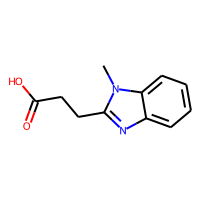
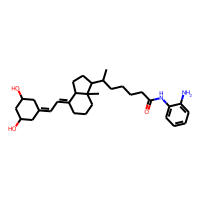
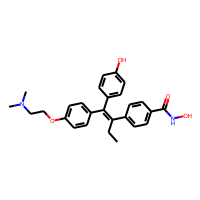
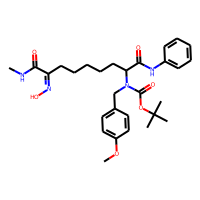
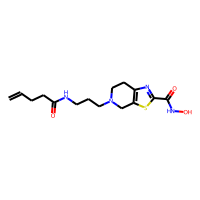

In [40]:
HTML(data_test.head().to_html())

In [41]:
PandasTools.WriteSDF(data_test, 'HDAC6_test.sdf', molColName='Molecule', properties=list(data.columns))

Creating work set

In [42]:
PandasTools.AddMoleculeColumnToFrame(data_work, 'canonical_smiles', 'Molecule')

,molecule_chembl_id,canonical_smiles,pchembl_value_mean,inchi,Molecule
3268,CHEMBL4209794,COc1cc2ncn(CCC(=O)O)c(=O)c2cc1OC,4.02,"InChI=1S/C13H14N2O5/c1-19-10-5-8-9(6-11(10)20-2)14-7-15(13(8)18)4-3-12(16)17/h5-7H,3-4H2,1-2H3,(H,16,17)",
910,CHEMBL1767039,CNC(=O)C(CCCCCCC(=O)Nc1cccc(-c2ccc(Cl)nc2)c1)=NO,4.03,"InChI=1S/C21H25ClN4O3/c1-23-21(28)18(26-29)9-4-2-3-5-10-20(27)25-17-8-6-7-15(13-17)16-11-12-19(22)24-14-16/h6-8,11-14,29H,2-5,9-10H2,1H3,(H,23,28)(H,25,27)",
926,CHEMBL1800246,CC(=O)Nc1ccc(C(=O)COc2nc(C)cc(O)n2)cc1,4.06,"InChI=1S/C15H15N3O4/c1-9-7-14(21)18-15(16-9)22-8-13(20)11-3-5-12(6-4-11)17-10(2)19/h3-7H,8H2,1-2H3,(H,17,19)(H,16,18,21)",
398,CHEMBL245548,O=C(C=Cc1cccc2ccccc12)NO,4.09,"InChI=1S/C13H11NO2/c15-13(14-16)9-8-11-6-3-5-10-4-1-2-7-12(10)11/h1-9,16H,(H,14,15)",
3925,CHEMBL4467915,CC1=CCCC2(C)CCC3=C(C)CCC(CC12)C3(C)C,4.10,"InChI=1S/C20H32/c1-14-7-6-11-20(5)12-10-17-15(2)8-9-16(13-18(14)20)19(17,3)4/h7,16,18H,6,8-13H2,1-5H3",

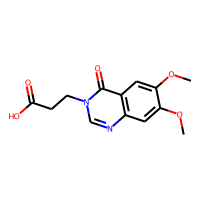
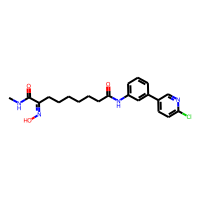
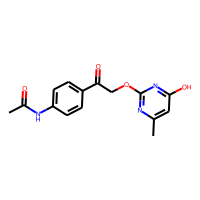
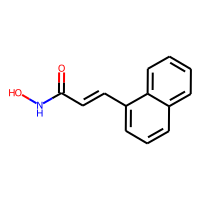
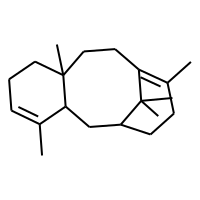

In [43]:
HTML(data_work.head().to_html())

In [44]:
PandasTools.WriteSDF(data_work, 'HDAC6_work.sdf', molColName='Molecule', properties=list(data.columns))